In [1]:
# Imports
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def plot_graph_with_coordinates(G, pos, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    #%matplotlib inline
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(20,10))
    plt.xlim([-0.2, 1.2])
    plt.ylim([-0.2, 2.5])
    edges = G.edges()
    weights = None
    d = dict(G.degree)
    
    # Green, yellow, blue
    options = {
        "node_color": "#A0CBE2",
        "width": 2,
        "with_labels": False,
    }
    
    # Blue scale
    #options = {
        #"node_color": "#A0CBE2",
        #"width": 2,
        #"edge_cmap": plt.cm.Blues,
        #"with_labels": False,
    #}
   
    if weight_name:
        weights = [G[u][v][weight_name] for u,v in edges]
        colors = []
        for w in weights:
            if w <= 0.3:
                colors.append("green")
            elif w>0.3 and w<=0.7:
                colors.append("#FFCC00")
            else:
                colors.append("red")
        
        # Sets up the colors (Blue Scale)
        #cols = list(range(len(edges)))
        #zipped = list(zip(weights, cols))
        #zipped.sort(key=lambda x: x[0])
        #_, coords = list(zip(*zipped))
        #colors = list(np.zeros(len(edges)))
        #for i, c in enumerate(coords):
            #colors[c] = i
        
        # Draws the network
        labels = nx.get_edge_attributes(G,weight_name)
        #nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw(G, pos, labels=labels, nodelist=list(d.keys()), 
                node_size=[v * 500 for v in d.values()], edge_color=colors, **options)
    else:
        nx.draw(G, pos, nodelist=list(d.keys()), 
                node_size=[v * 500 for v in d.values()], **options)

In [12]:
# Test dataframe
d_location = {'Stations': ['1','2','3','4','5','6','7'] ,
     'Latitude':list(np.random.random(7)) ,
     'Longitude':list(np.random.random(7))
    }

d_weight = {'Station_origin': ['1','2','3','4','5','6','4','2','3','7','5'] ,
     'Station_destiny':['2','3','1','1','1','3','7','5','4','5','6'] ,
     'Weight':list(np.random.random(11))
    }

location_df = pd.DataFrame.from_dict(d_location)
weight_df = pd.DataFrame.from_dict(d_weight)

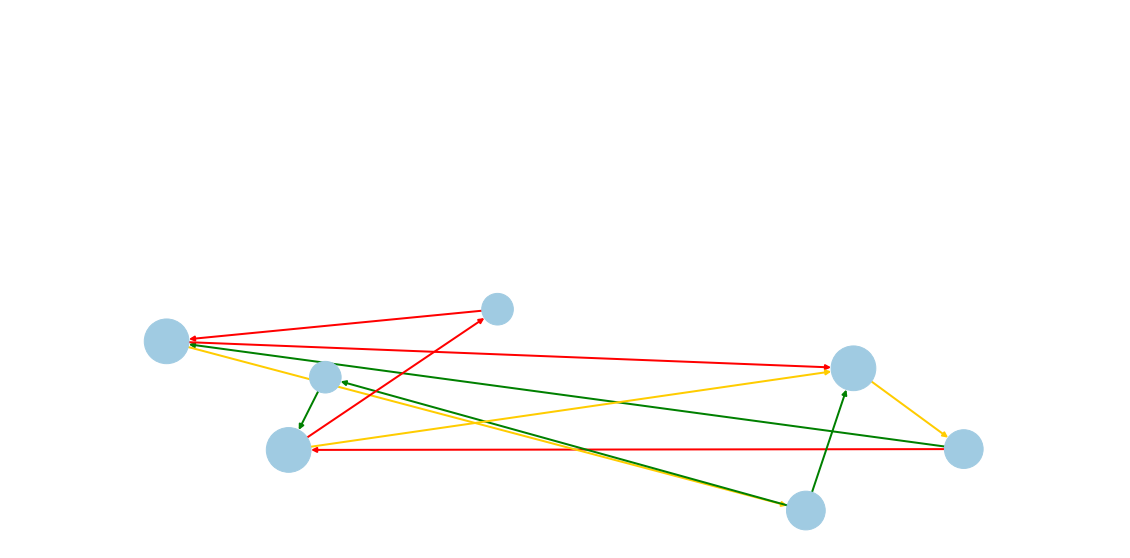

In [13]:
# Get edge_list
#df = pd.read_csv('Stations_positions.csv')
#df = df.replace(',','.', regex=True)

# Converts strings to numeric
weight_df['Weight'] = pd.to_numeric(weight_df['Weight'])
location_df['Latitude'] = pd.to_numeric(location_df['Latitude'])
location_df['Longitude'] = pd.to_numeric(location_df['Longitude'])

G_df = weight_df

pos_lat = location_df['Latitude'].to_list()
pos_long = location_df['Longitude'].to_list()

# Normalizing the coordinates
max_lat = max(pos_lat)
min_lat = min(pos_lat)
max_long = max(pos_long)
min_long = min(pos_long)

pos_lat_norm = [(x-min_lat)/(max_lat-min_lat) for x in pos_lat]
pos_long_norm = [(x-min_long)/(max_long-min_long) for x in pos_long]

stations = location_df['Stations']

pos = dict(zip(stations, zip(pos_lat_norm, pos_long_norm)))

G = nx.from_pandas_edgelist(G_df, 'Station_origin', 'Station_destiny', edge_attr=['Weight'], create_using=nx.DiGraph())

plot_graph_with_coordinates(G, pos, 'Weight')

In [14]:
# Anotar os valores das coordenadas que ficaram boas
location_df

,Stations,Latitude,Longitude
0,1,0.320687,0.504865
1,2,0.369927,0.250951
2,3,0.014087,0.589596
3,4,0.299441,0.057862
4,5,0.068567,0.248278
5,6,0.161801,0.690536
6,7,0.084923,0.476913
